In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [3]:
# amount that retiree can invest.  Answer from Questionaire.
savings_amount = 1000

#### Cryptocurrency Analysis
#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [4]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [5]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18782675,
            "id": 1,
            "last_updated": 1628663085,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 860875729125,
                    "percent_change_1h": 0.57454114704848,
                    "percent_change_24h": 0.792437678229911,
                    "percent_change_7d": 19.4994917447015,
                    "percentage_change_1h": 0.57454114704848,
                    "percentage_change_24h": 0.792437678229911,
                    "percentage_change_7d": 19.4994917447015,
                    "price": 45850.0,
                    "volume_24h": 34641889741
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18782675,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [6]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 117057813,
            "id": 1027,
            "last_updated": 1628663089,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 371922249606,
                    "percent_change_1h": 0.586697969146392,
                    "percent_change_24h": 2.07449519856915,
                    "percent_change_7d": 26.0150613288504,
                    "percentage_change_1h": 0.586697969146392,
                    "percentage_change_24h": 2.07449519856915,
                    "percentage_change_7d": 26.0150613288504,
                    "price": 3177.18,
                    "volume_24h": 30136204363
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 117057813,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [7]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The price for Bitcoin is ${btc_price:,.2f}")


The price for Bitcoin is $45,850.00


In [8]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for Ethereum is ${eth_price:,.2f}")


The price for Ethereum is $3,177.18


#### Calculate the amount of coins the retiree can afford to purchase.  
#### Take amount able to invest divide by 2, equals "half the amount".
#### Take "half the amount" divide by BTC price equals the amount of BTC to purchase.
#### Take "half the amount" divide by ETH price equals the amount of ETH to purchase.

In [9]:
half_savings = savings_amount / 2
btc_coins = half_savings / btc_price
eth_coins = half_savings / eth_price

In [10]:
# Print current holding in BTC
print(f"You now are holding {btc_coins} Bitcoin")

You now are holding 0.010905125408942203 Bitcoin


In [11]:
# Print current holding in ETH
print(f"The now are holding {eth_coins} Ethereum")

The now are holding 0.15737226093579842 Ethereum


#### BOOKMARK - will need to build dataframe with BTC and ETH data here.  Then run MC for forecasting.  Plan is to structure like the code below.

In [12]:
# Read in the CSV file called "Bitcoin Historical Data.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
btc_df = pd.read_csv(
    Path('./Resources/Bitcoin Historical Data.csv'), 
    index_col="Date", parse_dates=True, infer_datetime_format=True)

In [13]:
btc_df.loc[:,"Price"]=btc_df.loc[:,"Price"].str.replace(",","")
btc_df.loc[:,"Price"]=btc_df.loc[:,"Price"].astype("float")

btc_df.loc[:,"Open"]=btc_df.loc[:,"Open"].str.replace(",","")
btc_df.loc[:,"Open"]=btc_df.loc[:,"Open"].astype("float")

btc_df.loc[:,"High"]=btc_df.loc[:,"High"].str.replace(",","")
btc_df.loc[:,"High"]=btc_df.loc[:,"High"].astype("float")

btc_df.loc[:,"Low"]=btc_df.loc[:,"Low"].str.replace(",","")
btc_df.loc[:,"Low"]=btc_df.loc[:,"Low"].astype("float")

btc_df = btc_df.drop(columns=["Change %"])

In [14]:
# This function converts the string values into a floating point number
def clean_currency(price_string):
    price = price_string
    if type(price_string) == str:
        price_string = price_string.replace('$', '')
        if price_string[-1] == 'K':
            thousand = 1000
            price_string = price_string.replace('K', '')
            price = float(price_string)
            price = price * thousand
        elif price_string[-1] == 'M':
            million = 1000000
            price_string = price_string.replace('M', '')
            price = float(price_string)
            price = price * million
        else:
            billion = 1000000000
            price_string = price_string.replace('B', '')
            price = float(price_string)
            price = price * billion
    return price

In [15]:
btc_df['Vol.'] = btc_df['Vol.'].apply(clean_currency)

In [23]:
list(btc_df.columns)

['Price', 'Open', 'High', 'Low', 'Vol.']

In [31]:
btc_df2 = btc_df[['Open', 'High', 'Low', 'Price', 'Vol.']]
columns = ["open", "high"," low", "close", "volume"]
btc_df2.columns = columns
btc_df2.keys()


Index(['open', 'high', ' low', 'close', 'volume'], dtype='object')

In [18]:
# Read in the CSV file called "Bitcoin Historical Data.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
eth_df = pd.read_csv(
    Path('./Resources/Ethereum Historical Data.csv'), 
    index_col="Date", parse_dates=True, infer_datetime_format=True)

In [19]:
eth_df.loc[:,"Price"]=eth_df.loc[:,"Price"].str.replace(",","")
eth_df.loc[:,"Price"]=eth_df.loc[:,"Price"].astype("float")

eth_df.loc[:,"Open"]=eth_df.loc[:,"Open"].str.replace(",","")
eth_df.loc[:,"Open"]=eth_df.loc[:,"Open"].astype("float")

eth_df.loc[:,"High"]=eth_df.loc[:,"High"].str.replace(",","")
eth_df.loc[:,"High"]=eth_df.loc[:,"High"].astype("float")

eth_df.loc[:,"Low"]=eth_df.loc[:,"Low"].str.replace(",","")
eth_df.loc[:,"Low"]=eth_df.loc[:,"Low"].astype("float")

eth_df = eth_df.drop(columns=["Change %"])

eth_df['Vol.'] = eth_df['Vol.'].apply(clean_currency)

In [27]:
eth_df2 = eth_df[['Open', 'High', 'Low', 'Price', 'Vol.']]
columns = ["open", "high"," low", "close", "volume"]
eth_df2.columns = columns
eth_df2.head()

,open,high,low,close,volume
Date,,,,,
2021-07-30,2380.59,2467.40,2320.80,2460.95,1030000.0
2021-07-29,2299.46,2397.71,2269.15,2380.93,642750.0
2021-07-28,2300.21,2343.49,2246.23,2299.11,968940.0
2021-07-27,2230.24,2318.68,2152.92,2300.22,1250000.0
2021-07-26,2189.74,2430.01,2174.44,2229.53,1890000.0


In [32]:
# Create a dictionary of the two dataframes
to_merge_dict = {'BTC': btc_df2 , 'ETH': eth_df2}

In [33]:
# Use concat to create a merged dataframe from the dictionary
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

In [34]:
merged_df.head()

BTC                                           ETH           \
               open     high      low    close    volume     open     high   
Date                                                                         
2021-07-30  40001.1  42264.4  38358.4  42203.4   98450.0  2380.59  2467.40   
2021-07-29  40009.0  40630.7  39340.8  40001.4   75300.0  2299.46  2397.71   
2021-07-28  39450.4  40862.2  38883.8  40003.2  148920.0  2300.21  2343.49   
2021-07-27  37294.3  39455.9  36427.4  39452.0  100240.0  2230.24  2318.68   
2021-07-26  35392.3  40522.9  35236.7  37276.6  177630.0  2189.74  2430.01   

                                         
                low    close     volume  
Date                                     
2021-07-30  2320.80  2460.95  1030000.0  
2021-07-29  2269.15  2380.93   642750.0  
2021-07-28  2246.23  2299.11   968940.0  
2021-07-27  2152.92  2300.22  1250000.0  
2021-07-26  2174.44  2229.53  1890000.0

In [35]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# Run 500 samples.
MC_cryptothirtyyear = MCSimulation(
  portfolio_data = merged_df,
  weights = [.5, .5],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Review the simulation input data
MC_cryptothirtyyear.portfolio_data.head()


BTC                                                    \
               open     high      low    close    volume daily_return   
Date                                                                    
2021-07-30  40001.1  42264.4  38358.4  42203.4   98450.0          NaN   
2021-07-29  40009.0  40630.7  39340.8  40001.4   75300.0    -0.052176   
2021-07-28  39450.4  40862.2  38883.8  40003.2  148920.0     0.000045   
2021-07-27  37294.3  39455.9  36427.4  39452.0  100240.0    -0.013779   
2021-07-26  35392.3  40522.9  35236.7  37276.6  177630.0    -0.055140   

                ETH                                                     
               open     high      low    close     volume daily_return  
Date                                                                    
2021-07-30  2380.59  2467.40  2320.80  2460.95  1030000.0          NaN  
2021-07-29  2299.46  2397.71  2269.15  2380.93   642750.0    -0.032516  
2021-07-28  2300.21  2343.49  2246.23  2299.11   968940.0    -0.034365  
2021-07-27  2230.24  2318.68  2152.92  2300.22  1250000.0     0.000483  
2021-07-26  2189.74  2430.01  2174.44  2229.53  1890000.0    -0.030732

In [36]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_cryptothirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000
1,1.027989,1.074892,0.989516,1.009296,0.952883,1.044366,0.953179,0.959746,1.038082,0.977254,...,0.999597,1.032231,1.017008,0.974992,0.990346,0.975688,9.946866e-01,1.031171,1.020033,0.922421
2,1.043654,1.069713,0.992571,1.040562,0.983310,1.012048,0.902085,0.993642,1.054464,0.991412,...,1.005441,1.108171,1.092013,0.984176,0.978640,0.952785,1.060326e+00,1.010930,0.980743,0.856294
3,1.022124,1.069618,0.994302,1.108903,0.982625,1.013753,0.890520,0.962926,1.037306,0.937947,...,1.053194,1.172860,1.063646,0.948618,0.966776,0.986504,1.030115e+00,0.991121,0.967684,0.840170
4,1.032773,1.092548,1.035866,1.154271,0.982251,1.029938,0.851803,0.975712,1.025521,0.895520,...,1.041532,1.145058,1.080920,0.912423,0.925570,1.025728,1.018052e+00,1.005931,0.949355,0.800594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.000017,0.000175,0.001370,0.001989,0.000041,0.000827,0.013729,0.000422,0.033542,0.000209,...,0.000030,0.003982,0.000021,0.003999,0.002214,0.000359,7.731854e-07,0.000099,0.002570,0.000076
7557,0.000017,0.000173,0.001419,0.002042,0.000043,0.000800,0.014185,0.000429,0.032557,0.000207,...,0.000030,0.004056,0.000021,0.003924,0.002267,0.000346,7.812332e-07,0.000099,0.002491,0.000074
7558,0.000017,0.000176,0.001468,0.002018,0.000042,0.000799,0.013965,0.000445,0.033971,0.000200,...,0.000030,0.003829,0.000021,0.003663,0.002318,0.000329,7.839743e-07,0.000096,0.002578,0.000079
7559,0.000017,0.000178,0.001522,0.002052,0.000041,0.000787,0.013990,0.000452,0.035833,0.000199,...,0.000031,0.003746,0.000020,0.003997,0.002282,0.000324,7.852347e-07,0.000099,0.002535,0.000076


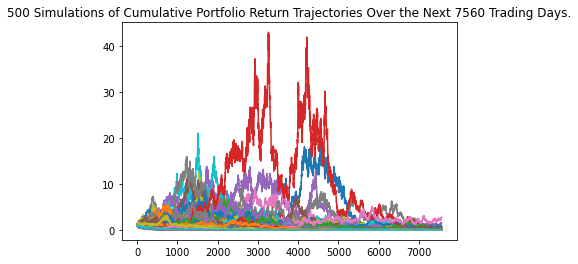

In [37]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_cryptothirtyyear.plot_simulation()

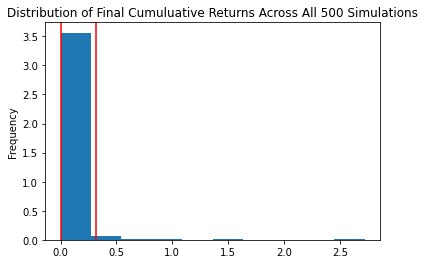

In [38]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_cryptothirtyyear.plot_distribution()


In [39]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_cryptothirtyyear.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           5.000000e+02
mean            2.958807e-02
std             1.599550e-01
min             5.306567e-08
25%             7.223902e-05
50%             5.803001e-04
75%             5.171897e-03
max             2.723305e+00
95% CI Lower    8.709848e-07
95% CI Upper    3.132435e-01
Name: 7560, dtype: float64


In [41]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of cryptocurrency is ${savings_amount:,.2f}")

The current balance of cryptocurrency is $1,000.00


In [42]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8]*savings_amount
ci_upper_thirty_cumulative_return = MC_summary_statistics[9]*savings_amount

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio over the next 30 years will end within in the range of ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")

There is a 95% chance that the portfolio over the next 30 years will end within in the range of $0.00 and $313.24.


## Coding for FAANG portion begins here

#### Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [22]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

#### Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [ ]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-07-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-30", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [ ]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


In [ ]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
fb_close_price = df_portfolio["FB"]["close"]
fb_close_price = float(fb_close_price)
# Print the FB closing price
print(f"The closing price of Facebook is ${fb_close_price:,.2f}")

In [ ]:
# Access the closing price for AMZN from the Alpaca DataFrame
# Converting the value to a floating point number
amzn_close_price = df_portfolio["AMZN"]["close"]
amzn_close_price = float(amzn_close_price)
# Print the AMZN closing price
print(f"The closing price of Amazon is ${amzn_close_price:,.2f}")

In [ ]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
aapl_close_price = df_portfolio["AAPL"]["close"]
aapl_close_price = float(aapl_close_price)
# Print the AAPL closing price
print(f"The closing price of Apple is ${aapl_close_price:,.2f}")

In [ ]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
nflx_close_price = df_portfolio["NFLX"]["close"]
nflx_close_price = float(nflx_close_price)
# Print the NFLX closing price
print(f"The closing price of Netflix is ${nflx_close_price:,.2f}")

In [ ]:
# Access the closing price for GOOG from the Alpaca DataFrame
# Converting the value to a floating point number
goog_close_price = df_portfolio["GOOG"]["close"]
goog_close_price = float(goog_close_price)
# Print the GOOG closing price
print(f"The closing price of Google is ${goog_close_price:,.2f}")

## Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for an even 5-way split between FAANG stocks.

2. Run a Monte Carlo simulation of 500 samples and (ANSWER FROM QUESTIONAIRE) for the FAANG portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics.

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics.

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [ ]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2018-07-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-30", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [ ]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df


# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())


#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# Run 500 samples.
MC_thirtyyear = MCSimulation(
  portfolio_data = prices_df,
  weights = [.2, .2, .2, .2, .2],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear.portfolio_data.head()


In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirtyyear.plot_simulation()


#### Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirtyyear.plot_distribution()


#### Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirtyyear.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of your investing in FAANG stocks is ${savings_amount:,.2f}")


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8]*savings_amount
ci_upper_thirty_cumulative_return = MC_summary_statistics[9]*savings_amount

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio over the next 30 years will end within in the range of ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")


## Coding for top 3 most popular mutual funds in 401(k) plans
https://www.yahoo.com/now/100-most-popular-mutual-funds-183200089.html

In [ ]:
tickers = ["VINIX", "FXAIX", "AEPGX"]

In [ ]:
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

In [ ]:
display(prices_df.head())
display(prices_df.tail())